<a href="https://colab.research.google.com/github/Erifai/SupervisedLearningProjectM2/blob/main/SupervisedLearningProjectM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  # this code, allow us to work with offline plotly version
import plotly.graph_objs as go                         # it's like "plt" of matplot
import plotly.tools as tls                             # It's useful to we get some tools of plotly
from collections import Counter                        # To do counter of some features
import plotly.figure_factory as ff




from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
df = pd.read_csv('/content/german.csv',header=None)  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [4]:
df.columns =['Statut du compte courant existant', 'Durée en mois', 'Historique de crédit', 'Objectif','Montant du crédit',
             "Compte d'épargne",'Emploi actuel depuis','Taux de versement en pourcentage du revenu disponible',
             'Statut personnel et sexe','Autres débiteurs','Résidence actuelle depuis','Propriété','Age en années',
             'Autres plans de versement','Logement','Nombre de crédits existants dans cette banque','Travail','Nombre de personnes à charge',
             'Téléphone','Travailleur étranger','Risk']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Statut du compte courant existant                      1000 non-null   object
 1   Durée en mois                                          1000 non-null   int64 
 2   Historique de crédit                                   1000 non-null   object
 3   Objectif                                               1000 non-null   object
 4   Montant du crédit                                      1000 non-null   int64 
 5   Compte d'épargne                                       1000 non-null   object
 6   Emploi actuel depuis                                   1000 non-null   object
 7   Taux de versement en pourcentage du revenu disponible  1000 non-null   int64 
 8   Statut personnel et sexe                               1000

In [6]:
df.head()

,Statut du compte courant existant,Durée en mois,Historique de crédit,Objectif,Montant du crédit,Compte d'épargne,Emploi actuel depuis,Taux de versement en pourcentage du revenu disponible,Statut personnel et sexe,Autres débiteurs,Résidence actuelle depuis,Propriété,Age en années,Autres plans de versement,Logement,Nombre de crédits existants dans cette banque,Travail,Nombre de personnes à charge,Téléphone,Travailleur étranger,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
df.isnull().sum()

Statut du compte courant existant                        0
Durée en mois                                            0
Historique de crédit                                     0
Objectif                                                 0
Montant du crédit                                        0
Compte d'épargne                                         0
Emploi actuel depuis                                     0
Taux de versement en pourcentage du revenu disponible    0
Statut personnel et sexe                                 0
Autres débiteurs                                         0
Résidence actuelle depuis                                0
Propriété                                                0
Age en années                                            0
Autres plans de versement                                0
Logement                                                 0
Nombre de crédits existants dans cette banque            0
Travail                                                 

In [8]:
#variable catégorielle
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

for col in cat_cols:
    print(df[col].value_counts(), "\n\n")

A14    394
A11    274
A12    269
A13     63
Name: Statut du compte courant existant, dtype: int64 


A32    530
A34    293
A33     88
A31     49
A30     40
Name: Historique de crédit, dtype: int64 


A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: Objectif, dtype: int64 


A61    603
A65    183
A62    103
A63     63
A64     48
Name: Compte d'épargne, dtype: int64 


A73    339
A75    253
A74    174
A72    172
A71     62
Name: Emploi actuel depuis, dtype: int64 


A93    548
A92    310
A94     92
A91     50
Name: Statut personnel et sexe, dtype: int64 


A101    907
A103     52
A102     41
Name: Autres débiteurs, dtype: int64 


A123    332
A121    282
A122    232
A124    154
Name: Propriété, dtype: int64 


A143    814
A141    139
A142     47
Name: Autres plans de versement, dtype: int64 


A152    713
A151    179
A153    108
Name: Logement, dtype: int64 


A173    630
A172    200
A174    148
A171     22
Name

In [9]:
# 1 = GOOD
# 2 = BAD
df['Risk'].value_counts()

1    700
2    300
Name: Risk, dtype: int64

In [12]:
type(df['Risk'][0])

numpy.int64

In [17]:
trace0 = go.Bar(
            x = df[df["Risk"]== 1]["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 1]["Risk"].value_counts().values,
            name='Good credit')

trace1 = go.Bar(
            x = df[df["Risk"]== 2]["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 2]["Risk"].value_counts().values,
            name='Bad credit')


data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
# fig.data[0].marker.line.width = 4
# fig.data[0].marker.line.color = "black"
# fig.data[1].marker.line.width = 4
# fig.data[1].marker.line.color = "black"
py.iplot(fig, filename='grouped-bar')

Number of Numerical Variable:  8


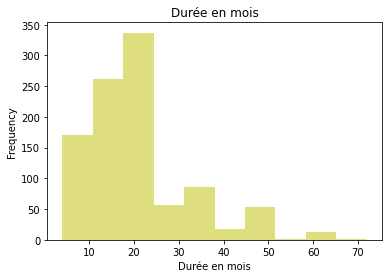

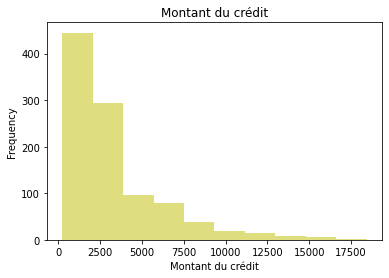

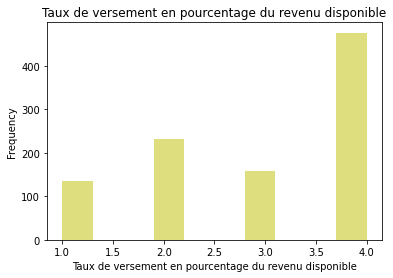

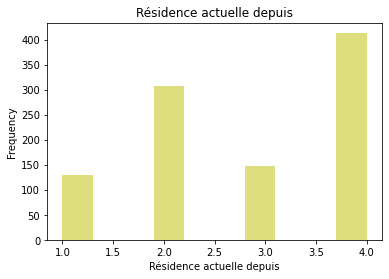

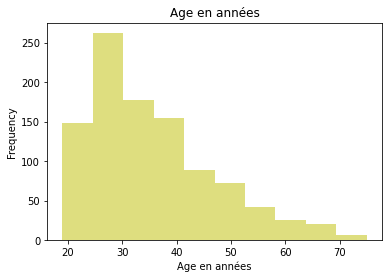

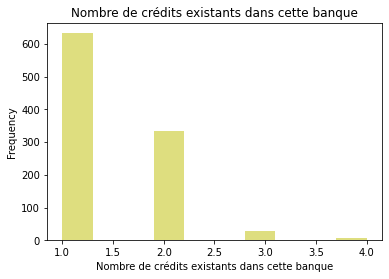

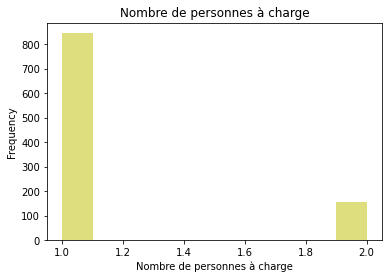

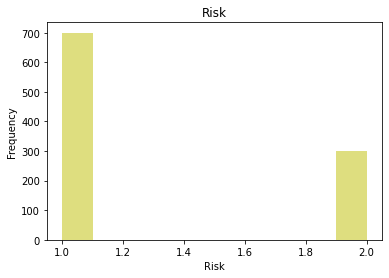

8 variables have been plotted


In [16]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Number of Numerical Variable: ', len(num_cols))


def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].plot.hist(alpha=0.5, color='y')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, num_cols)